# CIFAR-10 Generative Adversarial Network (GAN)

The goal of this repo is to practice developing a maching learning model by working with the CIFAR-10 dataset and creating a generative adversarial network (GAN) that produces images using a generator that the discriminator cannot differentiate from the original training set images.

## 1. Loading and Normalizing Dataset

The following imports the necessary torch and torchvision modules necessary for loading and normalizing CIFAR-10.

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

The following loads the actual CIFAR-10 dataset and defines the transformations to convert the PIL Images into suitable Tensors

In [5]:
batch_size = 4 # Process 4 images per epoch

transform = transforms.Compose(
    [transforms.ToTensor(), # Conversion from PIL image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Mean and std of 0.5 for each channel to get value of [-1, 1]

# Training dataset and loader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Testing dataset and loader
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Labels for the 10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:06<00:00, 26432297.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


This next section is a sanity check to ensure that images were properly loaded.

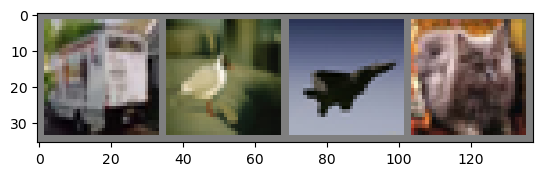

truck bird  plane cat  


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # Denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Retrieve some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))